# Sentiment Analysis


---

With the rise of online social media platforms like Twitter, Facebook and Reddit, and the proliferation of customer reviews on sites like Amazon and Yelp, we now have access, more than ever before, to massive text-based data sets! They can be analyzed in order to determine how large portions of the population feel about certain products, events, etc. This notebook shows an end-to-end sentiment classification system from scratch.


## Step 1: Exploring the data!

The dataset we are going to use is very popular among researchers in Natural Language Processing, usually referred to as the [IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/). It consists of movie reviews from the website [imdb.com](http://www.imdb.com/), each labeled as either '**pos**itive', if the reviewer enjoyed the film, or '**neg**ative' otherwise. Reference below.

> Maas, Andrew L., et al. [Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/). In _Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies_. Association for Computational Linguistics, 2011.


In [1]:
import os
import glob

def read_imdb_data(data_dir='data/imdb-reviews'):
    """Read IMDb movie reviews from given directory.
    
    Directory structure expected:
    - data/
        - train/
            - pos/
            - neg/
        - test/
            - pos/
            - neg/
    
    """

    # Data, labels to be returned in nested dicts matching the dir. structure
    data = {}
    labels = {}

    # Assume 2 sub-directories: train, test
    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}

        # Assume 2 sub-directories for sentiment (label): pos, neg
        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            # Fetch list of files for this sentiment
            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            # Read reviews data and assign labels
            for f in files:
                with open(f) as review:
                    data[data_type][sentiment].append(review.read())
                    labels[data_type][sentiment].append(sentiment)
            
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
    
    # Return data, labels as nested dicts
    return data, labels


data, labels = read_imdb_data()
print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
        len(data['train']['pos']), len(data['train']['neg']),
        len(data['test']['pos']), len(data['test']['neg'])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


Now that the data is loaded in, let's take a quick look at one of the positive reviews:

In [2]:
print(data['train']['pos'][2])

OK, this movie starts out like a cheesy Lifetime movie and doesn't get better till almost well through the movie. The script is full of 'cheese' and 'fluff' and cast is not well directed for the most part. For the first half of the movie the little girl grated on my nerves. I do not think this is one of her best acting jobs. The only reason I bought the movie is because it was on sale and had Ellen Burstyn in it. She's terrific but this is also not one of her best acting gigs. The story is based on true events and that helps the movie. Actually, I didn't even like the movie at first and was getting disgusted when I saw stills of the balloon traveling, I mean..let it get where it's suppose to go and be done with it! But all is forgiven by the time it does reach it's destination and the story comes to a close. If this doesn't bring a tear to your eye, nothing will! It's cheesy and predictable but also makes you feel good about the world again.


And one with a negative sentiment:

In [3]:
print(data['train']['neg'][2])

Nominated for the oscar "worst script ever" in my opinion. There's no decent story, rediculous acting, VERY lousy humor. By every means possible, if you have little self respect please don't waste your time seeing this movie. Although u can see the actors CAN act, it leaves you dumber after watching it. Precious braincells are being killed watching this crap...<br /><br />i warned u<br /><br />DON'T SEE THIS MOVIE


We can also make a wordcloud visualization of the reviews.

In [4]:
# Installing wordcloud
# !pip install wordcloud

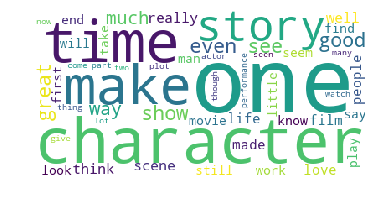

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

sentiment = 'pos'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

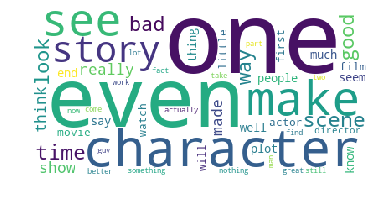

In [6]:
sentiment = 'neg'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

They look about the same, but for the words GOOD and BAD

In [7]:
# import random
from sklearn.utils import shuffle
x = ["Spears", "Adele", "NDubz", "Nicole", "Cristina"]
y = [1, 2, 3, 4, 5]

def shuffle_together( a, b):
    # author: tj
    combined = list( zip(a, b) )
    random.shuffle(combined)
    a[:], b[:] = zip(*combined)
    return a, b

In [8]:
x, y = shuffle(x,y)
print(x,y)

['Cristina', 'Adele', 'Nicole', 'NDubz', 'Spears'] [5, 2, 4, 3, 1]


### Form training and test sets

Now that we've seen what the raw data looks like, combine the positive and negative documents to get one unified training set and one unified test set.

In [9]:
from sklearn.utils import shuffle

def shuffle_together( a, b):
    # author: tj
    combined = list( zip(a, b) )
    shuffle(combined)
    a[:], b[:] = zip(*combined)
    return a, b
    
def prepare_imdb_data(data):
    """Prepare training and test sets from IMDb movie reviews."""
    
    # TODO: Combine positive and negative reviews and labels
#     for data_use in ['train','test']:
#         list_pos[ data_use ] = data[ data_use ]['pos']
#         labels[ data_use ] 
    data_train = data['train']['pos'] + data['train']['neg']
    labels_train = ['pos']*len( data['train']['pos']) + ['neg']*len( data['train']['neg']) 
    data_test = data['test']['pos'] + data['test']['neg']
    labels_test = ['pos']*len( data['test']['pos']) + ['neg']*len( data['test']['neg']) 
    # TODO: Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle( data_train, labels_train )
    data_test, labels_test = shuffle( data_test, labels_test )
    
    # Return a unified training data, test data, training labels, test labets
    return data_train, data_test, labels_train, labels_test


data_train, data_test, labels_train, labels_test = prepare_imdb_data(data)
print("IMDb reviews (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

IMDb reviews (combined): train = 25000, test = 25000


## Preprocessing

Our raw data includes HTML tags that need to be removed. We also need to remove non-letter characters, normalize uppercase letters by converting them to lowercase, tokenize, remove stop words, and stem the remaining words in each document.

### Convert each review to words

The following function review_to_words() take care of all of the above.

In [10]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/thojo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def review_to_words(review):
    """Convert a raw review string into a sequence of words."""
    
    #       Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem
    soup = BeautifulSoup(review,"lxml")
    text = soup.get_text()
    text = text.lower()
    text=re.sub(r"[^a-zA-Z0-9]", " ", text) #remove chararacters that aren't letters or digits
    words =  text.split() # tokenize -  The following didn't work because Resource 'punkt' is missing
    #now remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    words = [stemmer.stem(w) for w in words]
    # Return final list of words
    return words


review_to_words("""This is just a <em>test</em>.<br/><br />
But if it weren't a test, it would make for a <b>Great</b> movie review!""")

['test', 'test', 'would', 'make', 'great', 'movi', 'review']

With the function `review_to_words()` fully implemeneted, we can apply it to all reviews in both training and test datasets. This may take a while, so we need to build in a mechanism to write to a cache file and retrieve from it later.

In [12]:
import pickle

cache_dir = os.path.join("cache", "sentiment_analysis")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        words_train = list(map(review_to_words, data_train))
        words_test = list(map(review_to_words, data_test))
        
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])
    
    return words_train, words_test, labels_train, labels_test


# Preprocess data
words_train, words_test, labels_train, labels_test = preprocess_data(
        data_train, data_test, labels_train, labels_test)

# Take a look at a sample
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])

Read preprocessed data from cache file: preprocessed_data.pkl

--- Raw review ---
The Sunshine Boys is a terrific comedy about two ex-vaudevillians who reluctantly reunite for a TV special despite the fact that they despise each other.<br /><br />The comic genius of two masters at work, George Burns and Walter Matthau are stellar! Some of the best scenes are when the duo is fighting over the silliest little trivial things! The material is fast-paced and witty, appealing to all ages.<br /><br />MILD SPOILER ALERT: There are some mildly sad moments toward the end of the movie that deal indirectly with the affects of aging that gives the film a soft, sincere, tenderness that shows to this reviewer that what the pair really need the most for success, are each other.<br /><br />If anyone loves The Odd Couple, you'll adore this movie. An excellent film!

--- Preprocessed words ---
['blond', 'blonder', 'pamela', 'anderson', 'denis', 'richard', 'almost', 'everi', 'scene', 'want', 'movi', 'utte

## Extracting Bag-of-Words features

Now that each document has been preprocessed, we can transform each into a Bag-of-Words feature representation. Note that we need to create this transformation based on the training data alone, as we can't peek at the testing data.

The dictionary or _vocabulary_ $V$ (set of words shared by documents in the training set) used here will be the one on which we train our supervised learning algorithm. Any future test data must be transformed in the same way for us to be able to apply the learned model for prediction. Hence, it is important to store the transformation / vocabulary as well.

> **Note**: The set of words in the training set may not be exactly the same as the test set. What if we encounter a word during testing that you haven't seen before? Unfortunately, we'll have to ignore it, or replace it with a special `<UNK>` token.

### Compute Bag-of-Words features

In [13]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib
# joblib is an enhanced version of pickle that is more efficient for storing NumPy arrays

def extract_BoW_features(words_train, words_test, vocabulary_size=5000,
                         cache_dir=cache_dir, cache_file="bow_features.pkl"):
    """Extract Bag-of-Words for a given set of documents, already preprocessed into words."""
    
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Fit a vectorizer to training documents and use it to transform them

        vectorizer = CountVectorizer(max_features=vocabulary_size,
                preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
        features_train = vectorizer.fit_transform(words_train).toarray()

        # Apply the same vectorizer to transform the test documents (ignore unknown words)
        features_test = vectorizer.transform(words_test).toarray()
        
        # NOTE: Remember to convert the features using .toarray() for a compact representation
        
        # Write to cache file for future runs (store vocabulary as well)
        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])
    
    # Return both the extracted features as well as the vocabulary
    return features_train, features_test, vocabulary


# Extract Bag of Words features for both training and test datasets
features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)

# Inspect the vocabulary that was computed
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

# Sample
print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

Read features from cache file: bow_features.pkl
Vocabulary: 5000 words
Sample words: ['mention', 'cheek', 'event', 'shout', 'hat', 'verhoeven', 'terrorist', 'butler']

--- Preprocessed words ---
['kid', '50', '60', 'anyth', 'connect', 'disney', 'definit', 'great', 'happen', 'abl', 'get', 'actor', 'actress', 'want', 'best', 'time', 'somehow', 'disney', 'manag', 'screw', 'thing', 'spite', 'abund', 'resourc', 'disney', 'afford', 'best', 'writer', 'best', 'produc', 'director', 'still', 'screw', 'thing', 'movi', 'crap', 'sad', 'thing', 'suspect', 'disney', 'arrog', 'even', 'know', 'movi', 'good', 'bad', 'due', 'talent', 'actor', 'even', 'give', '3', '10']

--- Bag-of-Words features ---
[0 0 0 ... 0 0 0]

--- Label ---
neg


Let's try to visualize the Bag-of-Words feature vector for one of our training documents.

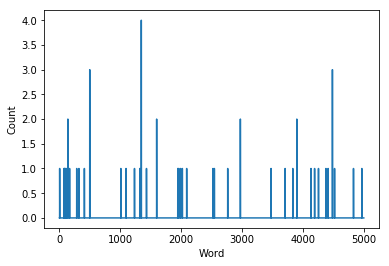

In [14]:
# Plot the BoW feature vector for a training document
plt.plot(features_train[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

In [15]:
np.mean(np.mean(features_train[:], axis=1))

0.021624239999999996

In [16]:
np.max(np.mean(features_train[:], axis=1))

0.2226

In [17]:
np.min(np.mean(features_train[:], axis=1))

0.0006

#### Sparse Bag-of-Words feature representation

On average, only 2.16% of the vocabulary is seen in a single document. The rest of the entries are zeros.  The biggest vocabulary use is 22%


### Zipf's law

[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), named after the American linguist George Zipf, is an empirical law stating that given a large collection of documents, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. In the figure below we plot number of appearances of each word in our training set against its rank.

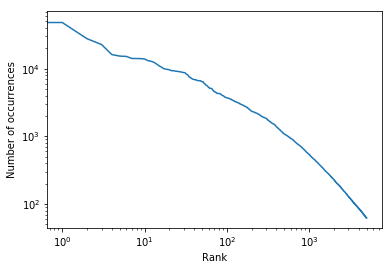

In [18]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot 
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

In [19]:
sorted_word_freq[:5] #not quite Zipf on the first 2, but, then it looks like it

array([51695, 48190, 27741, 22799, 16191])

#### Zipf's law

The most frequent word occurs 51695 times. The second is 48190, not 25000 as predicted by Zipf's law.  Perhaps because we threw out all stop words etc?


### Normalize feature vectors

Bag-of-Words features are intuitive to understand as they are simply word counts. But counts can vary a lot, and potentially throw off learning algorithms later in the pipeline. So, before we proceed further, we normalize the BoW feature vectors to have unit length.

This makes sure that each document's representation retains the unique mixture of feature components, but prevents documents with large word counts from dominating those with fewer words.

In [20]:
import sklearn.preprocessing as pr

# Normalize BoW features in training and test set
# first checking that pr.normalize is indeed dividing by the L2 norm of the vector
row = features_train[0,:]
x = pr.normalize(features_train[:1,:], axis=1)
y = row / np.sqrt(np.sum([elem**2 for elem in row]))
[np.sum(x), np.sum(y)]

[7.021870595978444, 7.021870595978444]

In [21]:
# Normalize BoW features in training and test set
features_train = pr.normalize(features_train, axis=1)
features_test = pr.normalize(features_test, axis=1)

## Classification using BoW features

Now that the data has all been properly transformed, we can feed it into a classifier. To get a baseline model, we train a Naive Bayes classifier from scikit-learn (specifically, [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)), and evaluate its accuracy on the test set.

In [22]:
from sklearn.naive_bayes import GaussianNB

# Train a Guassian Naive Bayes classifier
clf1 = GaussianNB()
clf1.fit(features_train, labels_train)

# Calculate the mean accuracy score on training and test sets
print("[{}] Accuracy: train = {}, test = {}".format(
        clf1.__class__.__name__,
        clf1.score(features_train, labels_train),
        clf1.score(features_test, labels_test)))

[GaussianNB] Accuracy: train = 0.8198, test = 0.72768


Tree-based algorithms often work quite well on Bag-of-Words as their highly discontinuous and sparse nature is nicely matched by the structure of trees. As your next task, you will try to improve on the Naive Bayes classifier's performance by using scikit-learn's Gradient-Boosted Decision Tree classifer.

### Gradient-Boosted Decision Tree classifier

Using [`GradientBoostingClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) from scikit-learn to classify the BoW data. This model has a number of parameters. 

> We can use a model selection technique such as cross-validation, grid-search, or an information criterion method, to find an optimal value for the hyperparameter.

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = 32

def classify_gboost(X_train, X_test, y_train, y_test):        
    # Initialize classifier
    clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=1.0, max_depth=1, random_state=0)

    # Classify the data using GradientBoostingClassifier
    clf.fit(X_train, y_train)
    # Perform hyperparameter tuning / model selection
    
    # Print final training & test accuracy
    print("[{}] Accuracy: train = {}, test = {}".format(
        clf.__class__.__name__,
        clf.score(X_train, y_train),
        clf.score(X_test, y_test) ) )
    # Return best classifier model
    return clf


clf2 = classify_gboost(features_train, features_test, labels_train, labels_test)

[GradientBoostingClassifier] Accuracy: train = 0.79472, test = 0.79004


### Adverserial testing

Tricking the algorithm to expose the main weakness of BoW by creating a movie review with a clear positive or negative sentiment that the model will classify incorrectly.


In [24]:
my_review = "Not the dreary bore that I expected it to be.  In fact, it was packed with action and I was at the edge of my seat. The pace of this movie makes the Matrix look depressingly quiet."
true_sentiment = 'pos'  # true sentiment 

# Apply the same preprocessing and vectorizing steps as you did for your training data
my_words = review_to_words( my_review )
vectorizer = CountVectorizer(vocabulary=vocabulary, 
                             preprocessor=lambda x: x, tokenizer=lambda x: x)  # already preprocessed
# note: # This vocabulary came from the vectorizer during previous training
# features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)
my_features = vectorizer.fit_transform( [my_words] ).toarray()

# Then call your classifier to label it
print("my review: ", my_review )
print("my words: ", my_words)
print("model-predicted sentiment: ", clf2.predict( my_features ), " whereas true sentiment is: ", true_sentiment)


my review:  Not the dreary bore that I expected it to be.  In fact, it was packed with action and I was at the edge of my seat. The pace of this movie makes the Matrix look depressingly quiet.
my words:  ['dreari', 'bore', 'expect', 'fact', 'pack', 'action', 'edg', 'seat', 'pace', 'movi', 'make', 'matrix', 'look', 'depressingli', 'quiet']
model-predicted sentiment:  ['neg']  whereas true sentiment is:  pos
